In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 18,#24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 18,#24,
          'legend.fontsize': 18,#20,
          'xtick.labelsize': 18,#24,
          'ytick.labelsize': 18,#24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [3]:
import h5py
from pycbc import conversions
import matplotlib.pyplot as pp
from pycbc.waveform import get_td_waveform, get_fd_waveform, get_waveform_filter_length_in_time

In [4]:
par = {'mass1':1.4,
      'mass2':1.4,
      'spin1z':0,
      'spin2z':0,
      'f_lower':400,
      'distance':400,
      'delta_f':1/256,
      'delta_t':1/16384,
      'approximant':'SpinTaylorT4'}

In [5]:

par.update({'approximant':'SpinTaylorT4'})
#par.update({'approximant':'TaylorF2'})

In [6]:
hp, hc = get_td_waveform(**par)

par.update({'spin1z':0.95,'spin2z':0.95})
hpp, hcp = get_td_waveform(**par)

par.update({'spin1z':-0.95,'spin2z':-0.95})
hpm, hcm = get_td_waveform(**par)

In [7]:
hp._epoch

LIGOTimeGPS(0, -47851562)

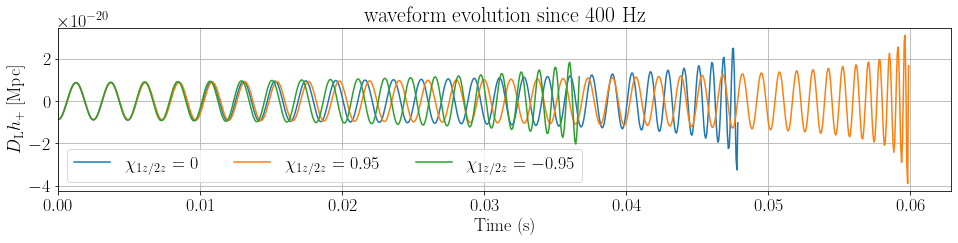

In [8]:
#plt.figure(figsize = [fig_width*2,fig_height])
plt.figure(figsize = [16,3])

plt.plot(hp.sample_times-float(hp._epoch),hp*par['distance'],label='$\chi_{1z/2z}=0$')
plt.plot(hpp.sample_times-float(hpp._epoch), hpp*par['distance'],label='$\chi_{1z/2z}=0.95$')
plt.plot(hpm.sample_times-float(hpm._epoch),hpm*par['distance'],label='$\chi_{1z/2z}=-0.95$')

plt.ylabel('$D_\mathrm{L}h_+$ [Mpc]')
plt.xlabel('Time (s)')
plt.legend(ncol=3)
plt.xlim(0,)
#plt.ylim(-1e-21,1e-21)
plt.title('waveform evolution since 400 Hz')
plt.savefig("waveform.png", bbox_inches='tight')